# **Correlation analysis in realworld data**

In [ ]:
install.packages("mlbench")
install.packages("EnvStats")
install.packages("GGally")
install.packages("nortest")
install.packages("ppcor")
install.packages("car")
install.packages("Hmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘nortest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
library(mlbench)
library(tidyverse)
library(EnvStats)
library(GGally)
library(nortest)
library(ppcor)
library(car)
library(Hmisc)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:EnvStats’:

    boxcox


The following object is masked from ‘package:dplyr’:

    select


Loading required package: carData


Attaching package: ‘car’


The following objec

In [ ]:
download.file("https://drive.usercontent.google.com/uc?id=1PgyHHQz0QL3Gb6vpRvurRP0bMC6RSFhm&authuser=0&export=download",
              tf <- tempfile())
bp<-readRDS(tf)

In [ ]:
glimpse(bp)

Rows: 462
Columns: 6
$ sbp       <dbl> 186, 175, 141, 194, 164, 161, 173, 134, 134, 161, 209, 164, …
$ age       <dbl> 49, 69, 45, 56, 47, 44, 37, 56, 32, 50, 60, 39, 22, 4, 50, 4…
$ tobacco   <dbl> 9.4440998, 0.9242011, 0.9242011, 8.1460058, 10.0311514, 7.68…
$ ldl       <dbl> 142.90353, 124.19088, 106.19259, 150.60094, 106.38149, 150.9…
$ adiposity <dbl> 22.894162, 27.808367, 31.770488, 40.130700, 27.044012, 36.93…
$ famhist   <fct> Present, Absent, Present, Present, Present, Present, Absent,…


**Data dictionary**

| Variable  | Describtion                            | Unit                  |
|-----------|---------------------------------------|-----------------------|
| sbp       | Systolic blood pressure                | mmHg                  |
| age       | Age                                    | Year                  |
| tobacco   | Cumulative tobacco consumption         | Packyear              |
| ldl       | Low-density lipoprotein cholesterol    | mg/dL                 |
| adiposity | Adipose tissue concentration           | kg/L                  |
| famhist   | Family history of cardiovascular disease| (1=Present, 0=Absent) |

**Check class of variables**

In [ ]:
data.frame(Variable = names(bp), Class = sapply(bp, class))

,Variable,Class
,<chr>,<chr>
sbp,sbp,numeric
age,age,numeric
tobacco,tobacco,numeric
ldl,ldl,numeric
adiposity,adiposity,numeric
famhist,famhist,factor


**Set hypothesis**

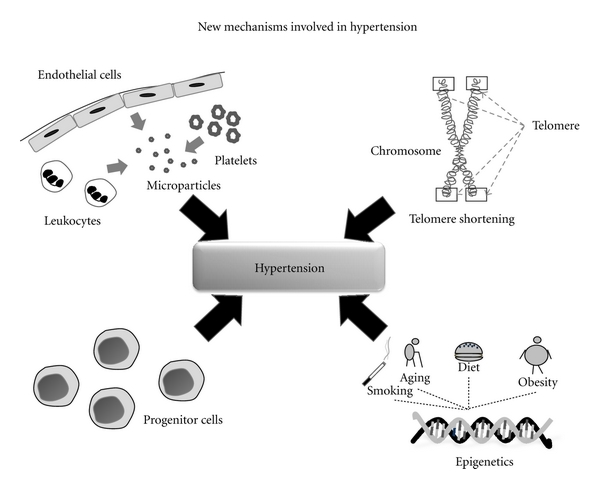

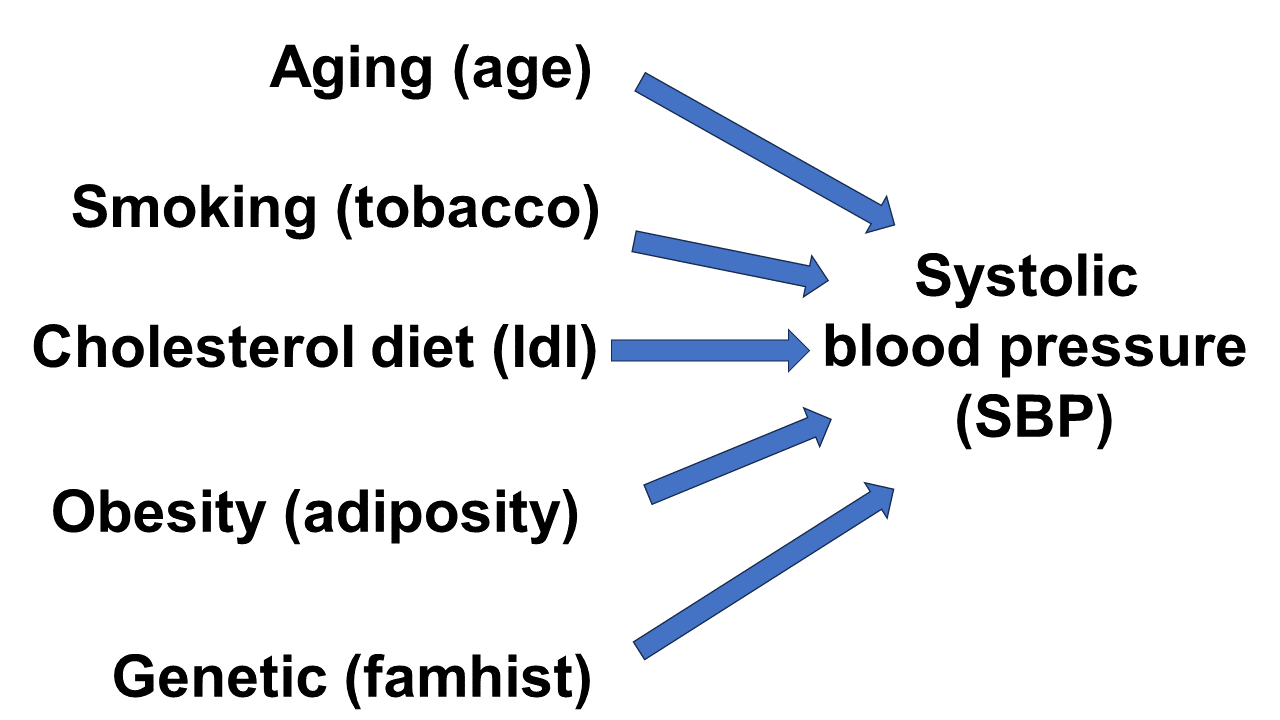

# **Cont. (Xs) - Cont. (Y)**

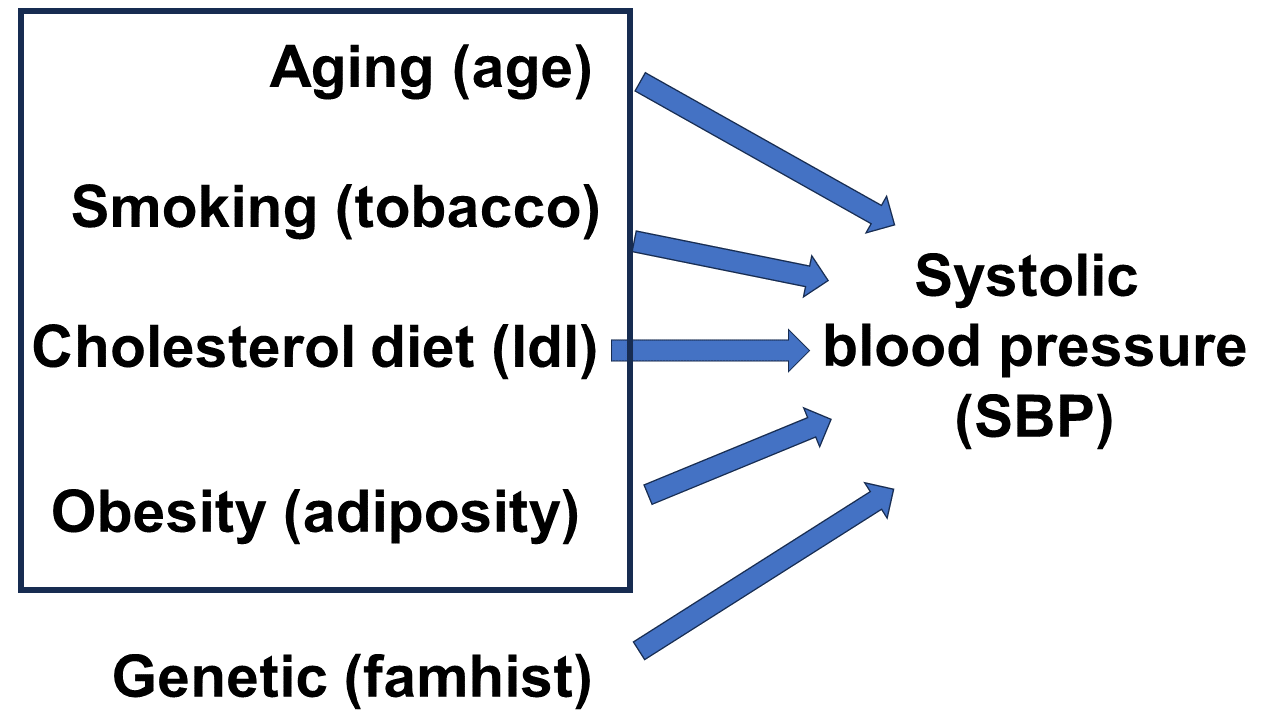

**Visualization**

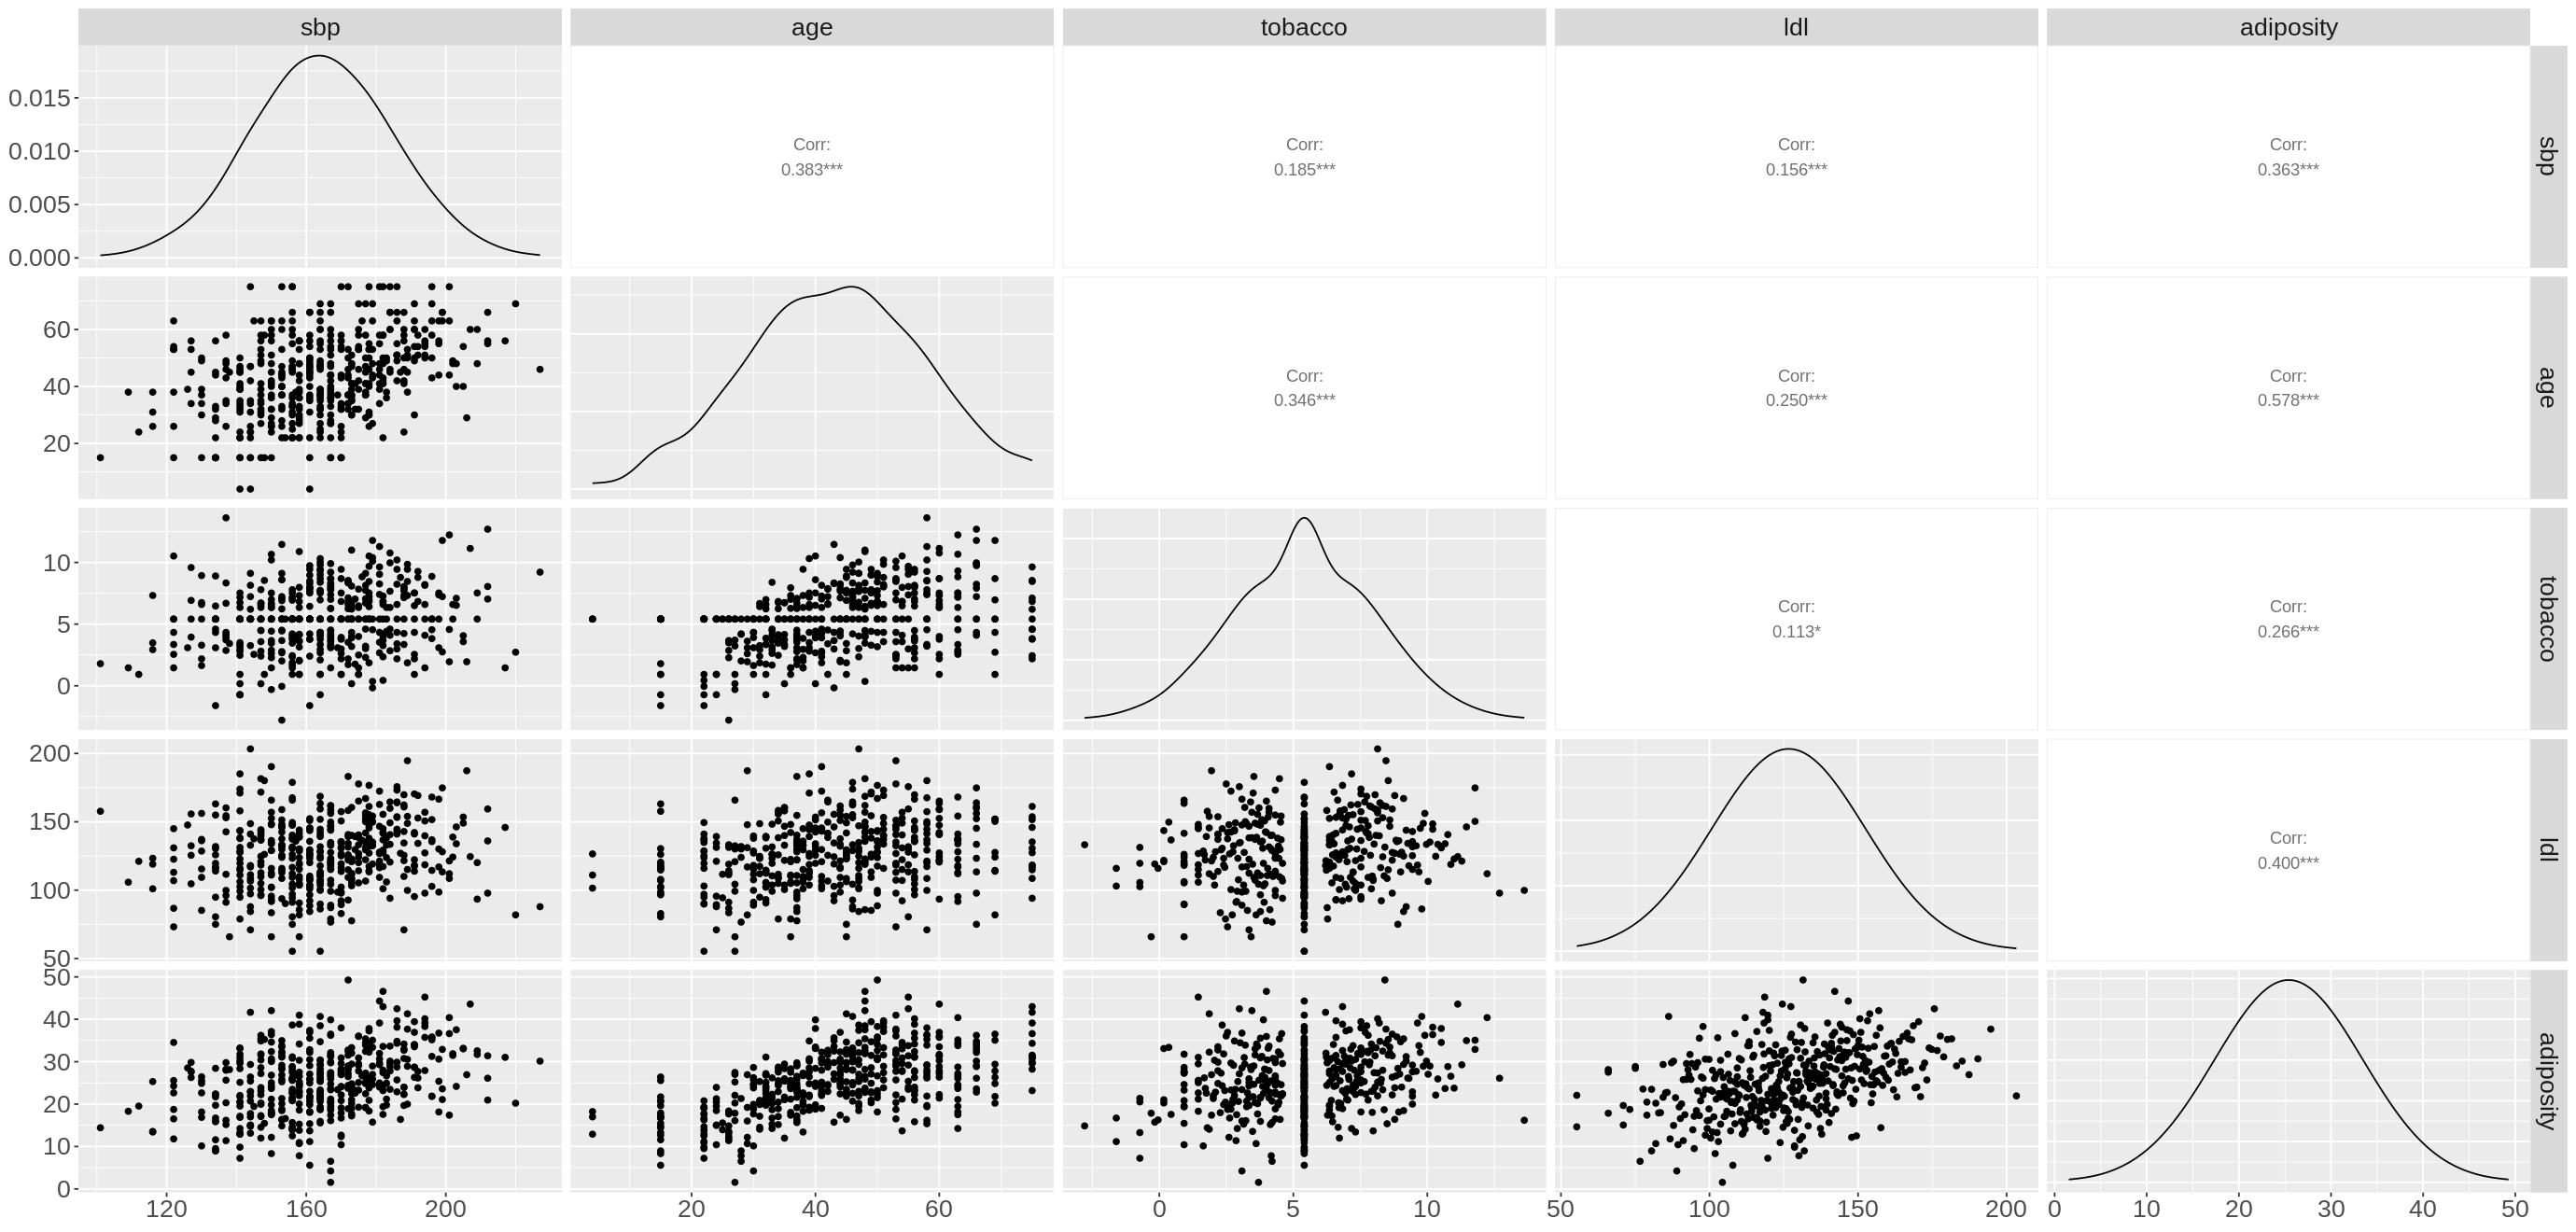

In [ ]:
options(repr.plot.width=23, repr.plot.height=11)
ggpairs(bp[,-6])+theme(text = element_text(size = 20))

## **Method 1. Assume no correlation among exposures.**

**1. Check multicolinearity**

In [53]:
vif(lm(sbp ~ age+tobacco+ldl+adiposity,dat=bp))

age   tobacco       ldl adiposity 
 1.596463  1.144471  1.191171  1.686833

In [52]:
data.frame(vif=vif(lm(sbp ~ age+tobacco+ldl+adiposity,dat=bp)))

,vif
,<dbl>
age,1.596463
tobacco,1.144471
ldl,1.191171
adiposity,1.686833


Interpret: No multicolinearity among exposures

**2. Correlation analysis**

In [44]:
cor_result<-cor(bp[,-6])

In [45]:
cor_result

,sbp,age,tobacco,ldl,adiposity
sbp,1.0000000,0.3828266,0.1852676,0.1555102,0.3634445
age,0.3828266,1.0000000,0.3458378,0.2499738,0.5775178
tobacco,0.1852676,0.3458378,1.0000000,0.1132693,0.2661914
ldl,0.1555102,0.2499738,0.1132693,1.0000000,0.3999321
adiposity,0.3634445,0.5775178,0.2661914,0.3999321,1.0000000


In [47]:
data.frame(r = cor_result[,1])

,r
,<dbl>
sbp,1.0000000
age,0.3828266
tobacco,0.1852676
ldl,0.1555102
adiposity,0.3634445


With R base function, you get only r values.

In [35]:
rcor_p<-rcorr(as.matrix(bp[,-6]))

In [36]:
print(rcor_p)

           sbp  age tobacco  ldl adiposity
sbp       1.00 0.38    0.19 0.16      0.36
age       0.38 1.00    0.35 0.25      0.58
tobacco   0.19 0.35    1.00 0.11      0.27
ldl       0.16 0.25    0.11 1.00      0.40
adiposity 0.36 0.58    0.27 0.40      1.00

n= 462 


P
          sbp    age    tobacco ldl    adiposity
sbp              0.0000 0.0000  0.0008 0.0000   
age       0.0000        0.0000  0.0000 0.0000   
tobacco   0.0000 0.0000         0.0149 0.0000   
ldl       0.0008 0.0000 0.0149         0.0000   
adiposity 0.0000 0.0000 0.0000  0.0000          


In [48]:
data.frame(r=rcor_p$r[,1],P_value=rcor_p$P[,1])

,r,P_value
,<dbl>,<dbl>
sbp,1.0000000,NA
age,0.3828266,0.000000e+00
tobacco,0.1852676,6.172390e-05
ldl,0.1555102,7.967066e-04
adiposity,0.3634445,6.661338e-16


**Interpret**

**sbp ~ age**: The correlation is approximately 0.383. This suggests a moderate positive relationship between age and systolic blood pressure (sbp). As age increases, sbp tends to increase as well.

**sbp ~ tobacco**: The correlation is approximately 0.185. This suggests a weak positive relationship between tobacco use and sbp.

**sbp ~ ldl**: The correlation is approximately 0.156. This suggests a weak positive relationship between LDL cholesterol levels and sbp.

**sbp ~ adiposity**: The correlation is approximately 0.363. This suggests a moderate positive relationship between adiposity and sbp.

None of the correlations are due to random chance.

## **Method 2. Assume correlation among exposures: partial correlation analysis**

In [55]:
pcor_result<-pcor(bp[,-6])

In [56]:
print(pcor_result)

$estimate
                  sbp        age     tobacco         ldl  adiposity
sbp       1.000000000 0.21048422 0.045597571 0.006222133 0.17306440
age       0.210484222 1.00000000 0.228702742 0.022399576 0.44517012
tobacco   0.045597571 0.22870274 1.000000000 0.001270372 0.07243465
ldl       0.006222133 0.02239958 0.001270372 1.000000000 0.31616505
adiposity 0.173064396 0.44517012 0.072434646 0.316165055 1.00000000

$p.value
                   sbp          age      tobacco          ldl    adiposity
sbp       0.000000e+00 5.409904e-06 3.296899e-01 8.942388e-01 1.946798e-04
age       5.409904e-06 0.000000e+00 7.337261e-07 6.321902e-01 1.003413e-23
tobacco   3.296899e-01 7.337261e-07 0.000000e+00 9.783460e-01 1.212219e-01
ldl       8.942388e-01 6.321902e-01 9.783460e-01 0.000000e+00 4.097112e-12
adiposity 1.946798e-04 1.003413e-23 1.212219e-01 4.097112e-12 0.000000e+00

$statistic
                sbp        age    tobacco        ldl adiposity
sbp       0.0000000  4.6027530 0.97577966 0.133

In [57]:
data.frame(R=pcor_result$estimate[,1],P_value=pcor_result$p.value[,1])

,R,P_value
,<dbl>,<dbl>
sbp,1.000000000,0.000000e+00
age,0.210484222,5.409904e-06
tobacco,0.045597571,3.296899e-01
ldl,0.006222133,8.942388e-01
adiposity,0.173064396,1.946798e-04


**Interpret**

**sbp ~ age**: The partial correlation coefficient is approximately 0.210. This suggests a weak to moderate positive relationship between age and systolic blood pressure (sbp), **while controlling for other variables in the model.**

**sbp ~ tobacco**: The partial correlation coefficient is approximately 0.046. This suggests a very weak positive relationship between tobacco use and sbp, **after controlling for other variables.**

**sbp ~ ldl**: The partial correlation coefficient is approximately 0.006. This is very close to zero, suggesting virtually no relationship between LDL cholesterol levels and sbp **after controlling for other variables.**

**sbp ~ adiposity**: The partial correlation coefficient is approximately 0.173. This suggests a weak positive relationship between adiposity and sbp, **while controlling for other variables.**

## **Method 3. Assume correlation among exposures: linear regression**

In [58]:
summary(lm(sbp ~ age+tobacco+ldl+adiposity,dat=bp))


Call:
lm(formula = sbp ~ age + tobacco + ldl + adiposity, data = bp)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.872 -11.630   0.765  13.649  57.988 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.329e+02  4.819e+00  27.591  < 2e-16 ***
age         3.506e-01  7.617e-02   4.603 5.41e-06 ***
tobacco     3.395e-01  3.479e-01   0.976 0.329690    
ldl         5.034e-03  3.785e-02   0.133 0.894239    
adiposity   5.431e-01  1.446e-01   3.756 0.000195 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.59 on 457 degrees of freedom
Multiple R-squared:  0.1787,	Adjusted R-squared:  0.1715 
F-statistic: 24.86 on 4 and 457 DF,  p-value: < 2.2e-16


$R^2$ value of 0.1715 suggests that approximately 17.15% of the variability in systolic blood pressure (sbp) can be explained by combination of exposures (age, tobacco, ldl, and adiposity). (overall $R^2$)

It is unlikely that these results are due to random chance.


# **Cont. & Cate. (Xs) - Cont. (Y)**

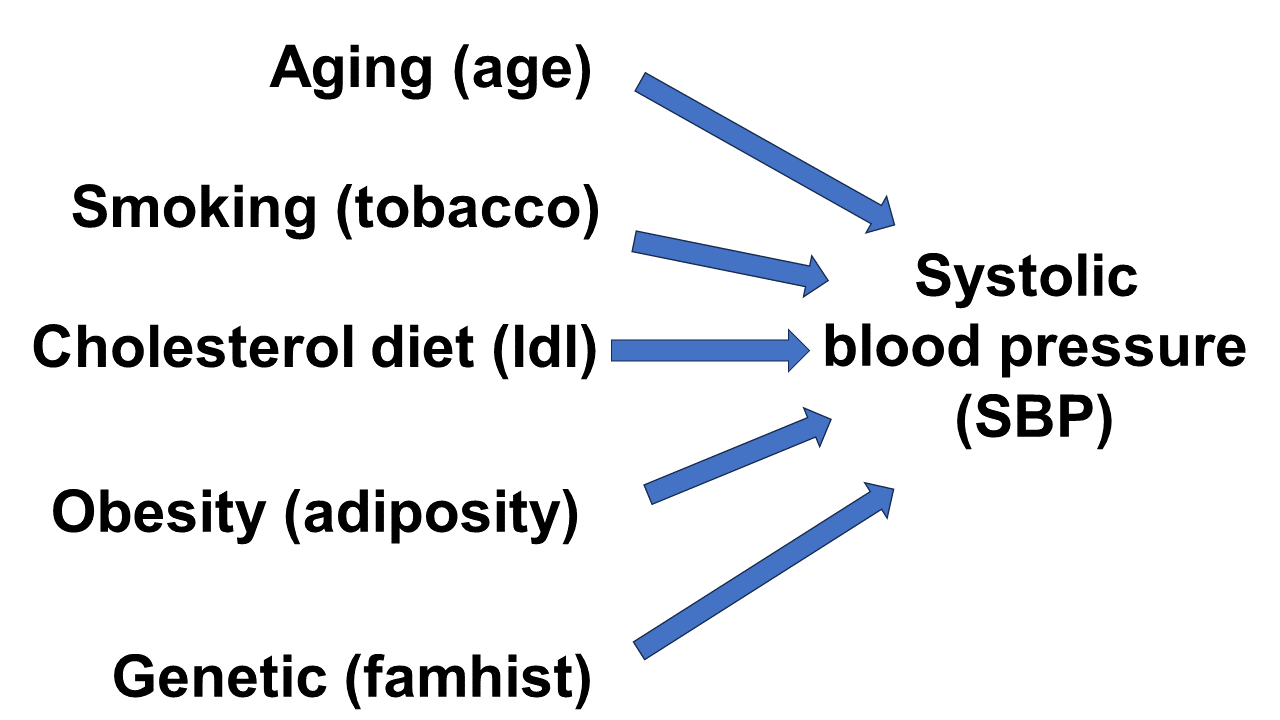

**Visualization**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


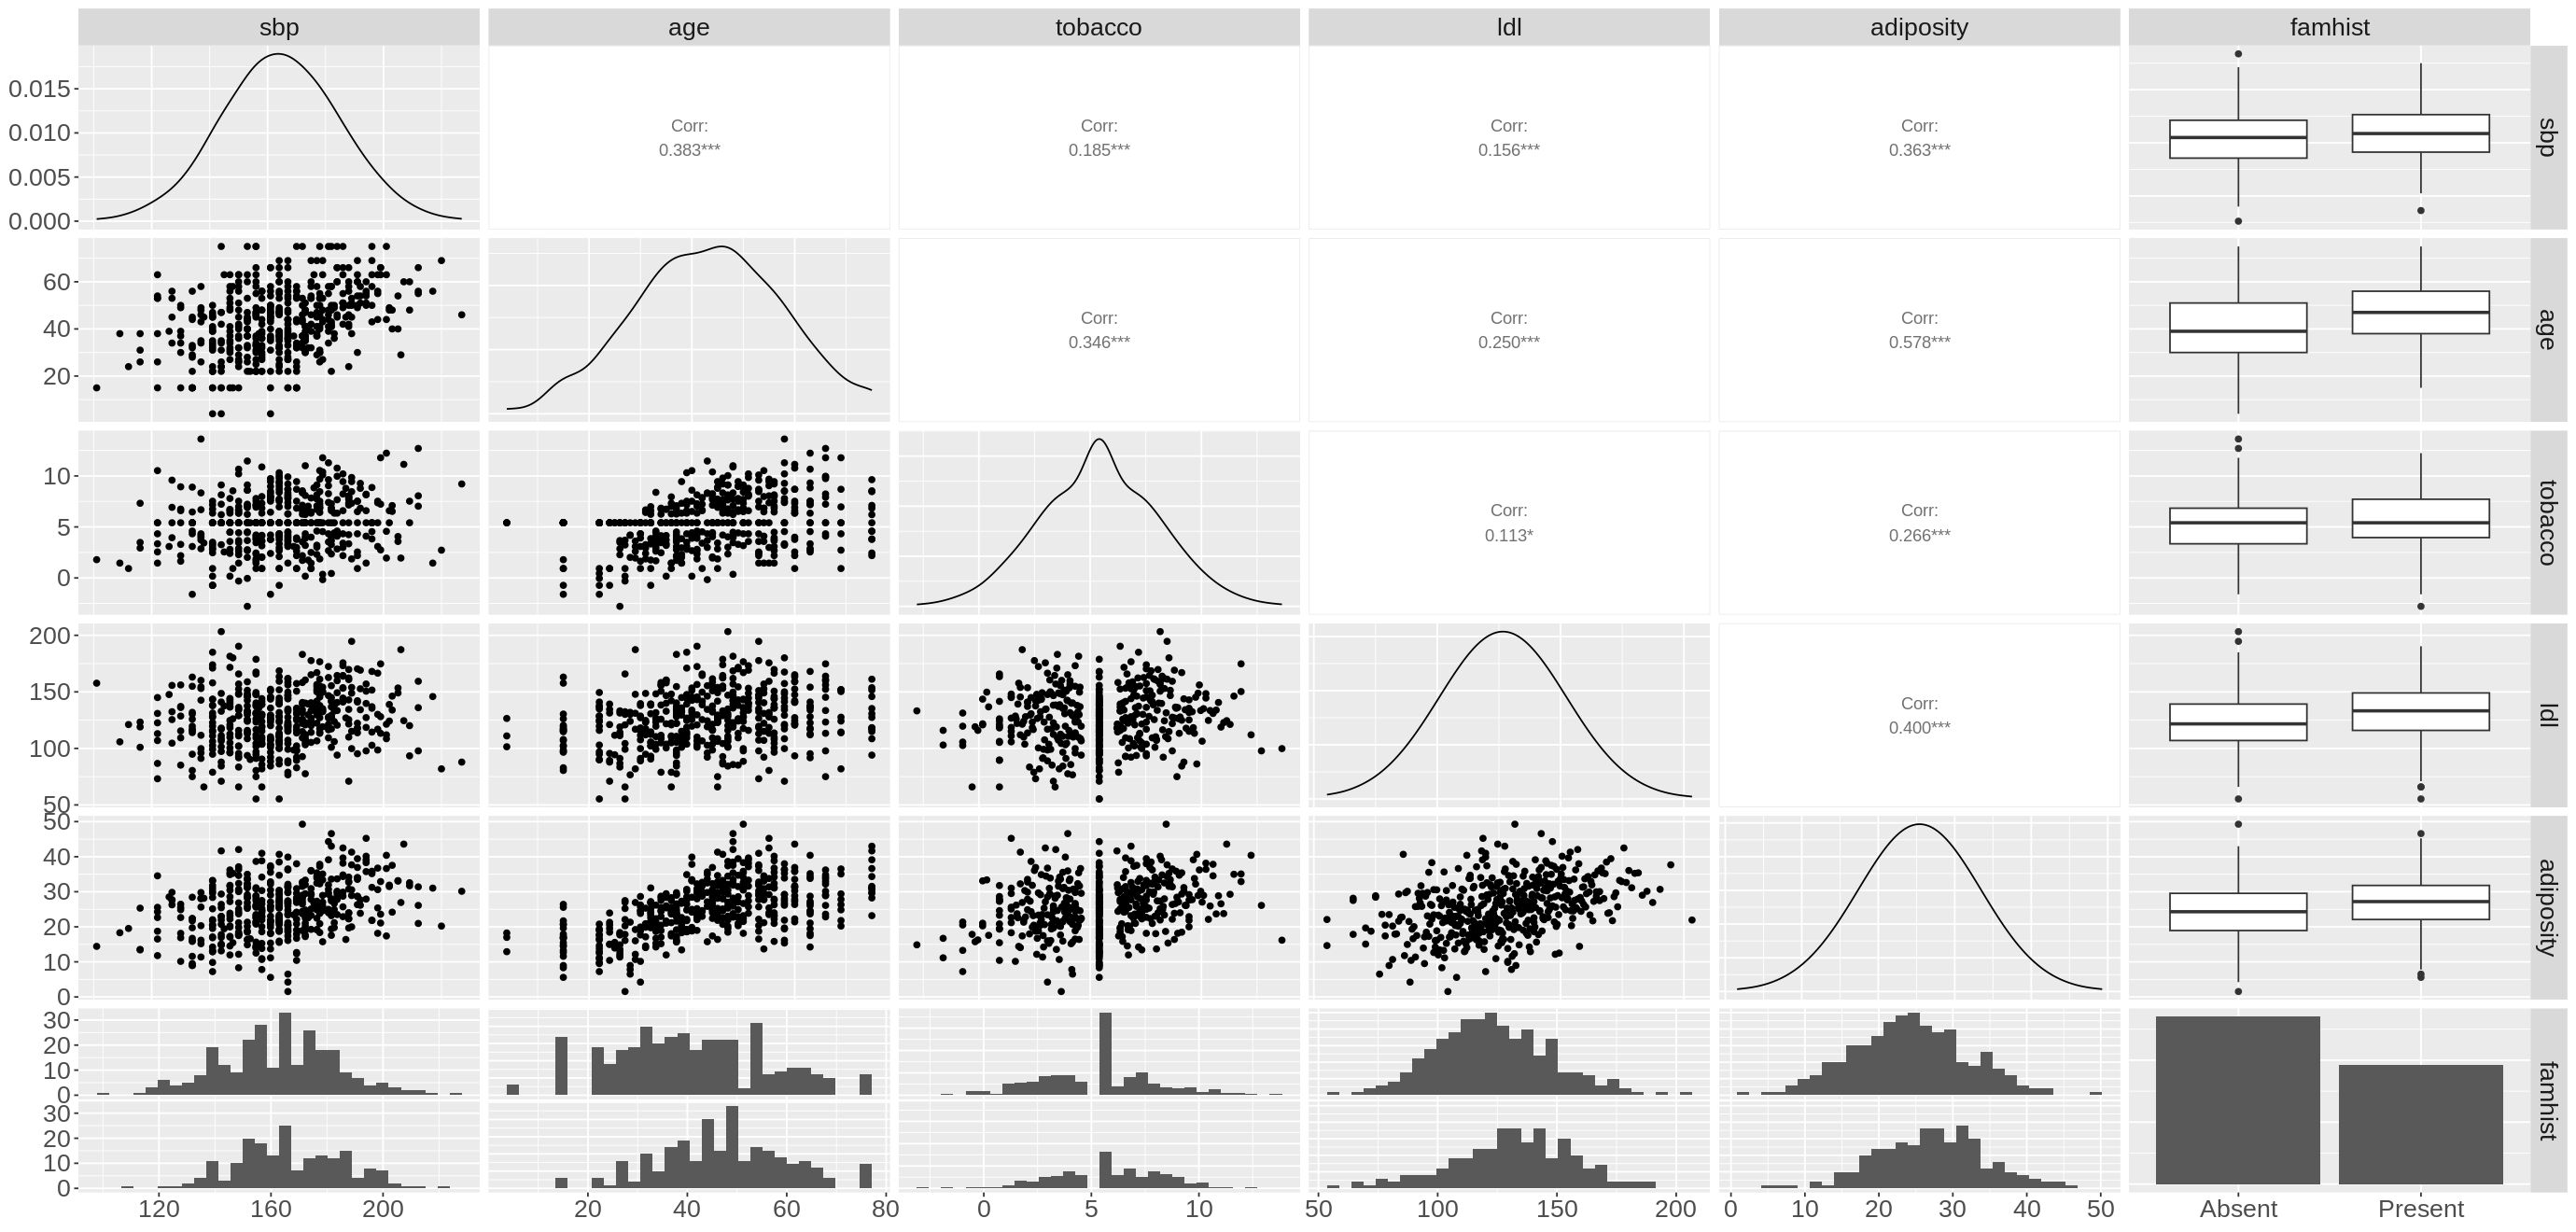

In [62]:
options(repr.plot.width=23, repr.plot.height=11)
ggpairs(bp)+theme(text = element_text(size = 20))

In [64]:
levels(bp$famhist)

[1] "Absent"  "Present"

## **Method 1. Assume no correlation among exposures.**

First: convert famhist to 0/1 variable.

In [65]:
bp$famhist<-bp$famhist=="Present"

**1. Check multicolinearity**

In [68]:
data.frame(vif=vif(lm(sbp ~ age+tobacco+ldl+adiposity+famhist,dat=bp)))

,vif
,<dbl>
age,1.628592
tobacco,1.144620
ldl,1.201049
adiposity,1.688165
famhist,1.064875


**2. Correlation analysis**

In [69]:
rcor_p<-rcorr(as.matrix(bp))

In [70]:
data.frame(r=rcor_p$r[,1],P_value=rcor_p$P[,1])

,r,P_value
,<dbl>,<dbl>
sbp,1.00000000,NA
age,0.38282662,0.000000e+00
tobacco,0.18526758,6.172390e-05
ldl,0.15551022,7.967066e-04
adiposity,0.36344445,6.661338e-16
famhist,0.09996909,3.168855e-02


## **Method 2. Assume correlation among exposures: partial correlation analysis**

In [72]:
pcor_result<-pcor(bp)

In [74]:
data.frame(R=pcor_result$estimate[,1],P_value=round(pcor_result$p.value[,1],4))

,R,P_value
,<dbl>,<dbl>
sbp,1.000000000,0.0000
age,0.207973810,0.0000
tobacco,0.045550345,0.3307
ldl,0.005840127,0.9008
adiposity,0.172893954,0.0002
famhist,0.003930152,0.9332


After adjusted by other variables, tobacco use, ldl, and family history of CVD may correlate with higher SBP due to random chance.

## **Method 3. Assume correlation among exposures: linear regression**

In [75]:
summary(lm(sbp ~ age+tobacco+ldl+adiposity+famhist,dat=bp))


Call:
lm(formula = sbp ~ age + tobacco + ldl + adiposity + famhist, 
    data = bp)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.793 -11.660   0.756  13.597  58.045 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.330e+02  4.832e+00  27.520  < 2e-16 ***
age         3.497e-01  7.702e-02   4.540  7.2e-06 ***
tobacco     3.391e-01  3.483e-01   0.974 0.330722    
ldl         4.745e-03  3.805e-02   0.125 0.900806    
adiposity   5.427e-01  1.448e-01   3.748 0.000201 ***
famhistTRUE 1.522e-01  1.813e+00   0.084 0.933152    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.61 on 456 degrees of freedom
Multiple R-squared:  0.1787,	Adjusted R-squared:  0.1697 
F-statistic: 19.85 on 5 and 456 DF,  p-value: < 2.2e-16


$R^2$ value of 0.1697 suggests that approximately 16.97% of the variability in systolic blood pressure (sbp) can be explained by the combination of exposures (age, tobacco, ldl, adiposity, and famhist).

It is unlikely that these results are due to random chance.